# Car Evaluation

*Supervised Learning*

CS7641 - Machine Learning

Kamolphan Liwprasert (kliwprasert3@gatech.edu)

GTID: 903457032


# Dataset Information
https://archive.ics.uci.edu/ml/datasets/car+evaluation

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was derived from a simple hierarchical
   decision model originally developed for the demonstration of DEX
   (M. Bohanec, V. Rajkovic: Expert system for decision
   making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates
   cars according to the following concept structure:
```
   CAR                      car acceptability
   . PRICE                  overall price
   . . buying               buying price
   . . maint                price of the maintenance
   . TECH                   technical characteristics
   . . COMFORT              comfort
   . . . doors              number of doors
   . . . persons            capacity in terms of persons to carry
   . . . lug_boot           the size of luggage boot
   . . safety               estimated safety of the car
```
   Input attributes are printed in lowercase. Besides the target
   concept (CAR), the model includes three intermediate concepts:
   PRICE, TECH, COMFORT. Every concept is in the original model
   related to its lower level descendants by a set of examples (for
   these examples sets see http://www-ai.ijs.si/BlazZupan/car.html).

   The Car Evaluation Database contains examples with the structural
   information removed, i.e., directly relates CAR to the six input
   attributes: buying, maint, doors, persons, lug_boot, safety.

   Because of known underlying concept structure, this database may be
   particularly useful for testing constructive induction and
   structure discovery methods.

5. Number of Instances: 1728
   (instances completely cover the attribute space)

6. Number of Attributes: 6

7. Attribute Values:
```
   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
```
8. Missing Attribute Values: none

9. Class Distribution (number of instances per class)
```
   class      N          N[%]
   -----------------------------
   unacc     1210     (70.023 %) 
   acc        384     (22.222 %) 
   good        69     ( 3.993 %) 
   v-good      65     ( 3.762 %) 
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')

In [2]:
data = pd.read_csv('car.data', header=None)
data.columns = ['buying', 'maint','doors', 'persons','lug_boot', 'safety','class']

print("Dataset Shape: ", data.shape)
data.head()

Dataset Shape:  (1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# EDA

In [3]:
# Plots directory
import os

if not os.path.exists('car_plots'):
    os.makedirs('car_plots')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,more,big,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
data.isnull().any()
# no data to impute 

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
class       False
dtype: bool

In [7]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

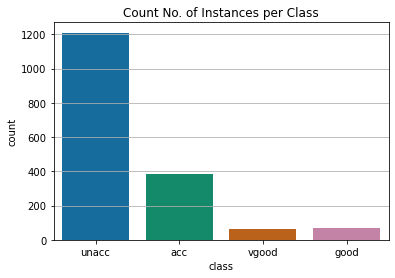

In [8]:
ax = sns.countplot(data['class'])
ax.set_title('Count No. of Instances per Class')
plt.savefig('car_plots/count_class.png')

class   acc  good  unacc  vgood
buying                         
high    108     0    324      0
low      89    46    258     39
med     115    23    268     26
vhigh    72     0    360      0


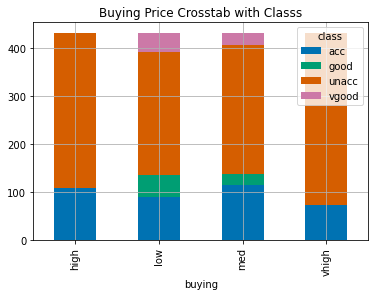

In [9]:
ct = pd.crosstab(data['buying'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Buying Price Crosstab with Classs')
plt.savefig('car_plots/crosstab_buying.png')

class  acc  good  unacc  vgood
maint                         
high   105     0    314     13
low     92    46    268     26
med    115    23    268     26
vhigh   72     0    360      0


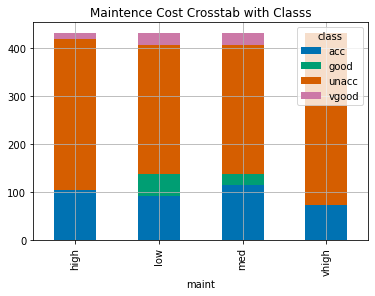

In [10]:
ct = pd.crosstab(data['maint'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Maintence Cost Crosstab with Classs')
plt.savefig('car_plots/crosstab_maint.png')

class  acc  good  unacc  vgood
doors                         
2       81    15    326     10
3       99    18    300     15
4      102    18    292     20
5more  102    18    292     20


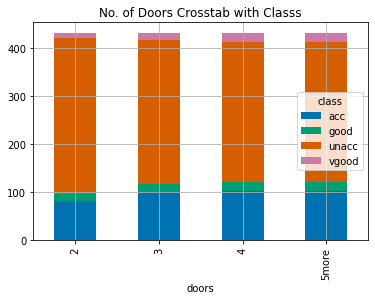

In [11]:
ct = pd.crosstab(data['doors'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('No. of Doors Crosstab with Classs')
plt.savefig('car_plots/crosstab_door.png')

class    acc  good  unacc  vgood
persons                         
2          0     0    576      0
4        198    36    312     30
more     186    33    322     35


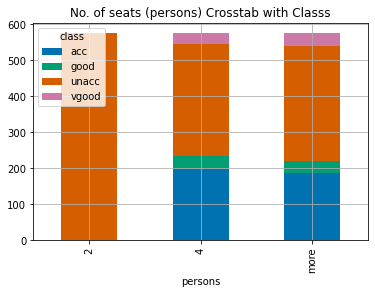

In [12]:
ct = pd.crosstab(data['persons'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('No. of seats (persons) Crosstab with Classs')
plt.savefig('car_plots/crosstab_persons.png')

class     acc  good  unacc  vgood
lug_boot                         
big       144    24    368     40
med       135    24    392     25
small     105    21    450      0


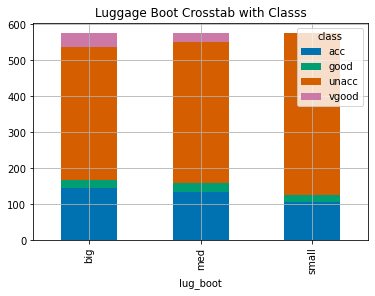

In [13]:
ct = pd.crosstab(data['lug_boot'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Luggage Boot Crosstab with Classs')
plt.savefig('car_plots/crosstab_lug_boot.png')

class   acc  good  unacc  vgood
safety                         
high    204    30    277     65
low       0     0    576      0
med     180    39    357      0


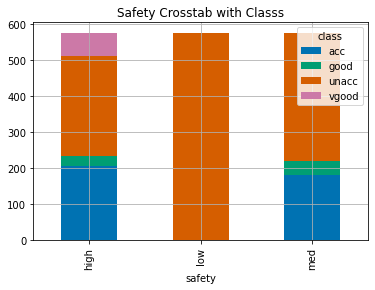

In [14]:
ct = pd.crosstab(data['safety'], data['class'])
print(ct)
ax = ct.plot.bar(stacked=True)
ax.set_title('Safety Crosstab with Classs')
plt.savefig('car_plots/crosstab_safety.png')

# Label Encoding
Original Dataset
```
   buying       vhigh, high, med, low
   maint        vhigh, high, med, low
   doors        2, 3, 4, 5more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
   
   class        unacc, acc, good, vgood
```

Encoded Dataset
```
   buying       4, 3, 2, 1
   maint        4, 3, 2, 1
   doors        2, 3, 4, 5
   persons      2, 4, 6
   lug_boot     1, 2, 3
   safety       1, 2, 3
   
   class        0, 1, 2, 3
```
Note: There is no dash symbol in original dataset, only appears in dataset description.

In [15]:
def label_encoding(car_dataset):
    encoded = car_dataset.replace('vhigh', 4).replace('high', 3).replace('med', 2).replace('low', 1)\
    .replace('5more', 5).replace('more', 6).replace('small', 1).replace('big', 3).replace('unacc', 0)\
    .replace('acc', 1).replace('good', 2).replace('vgood', 3)
    return encoded

In [16]:
data = label_encoding(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


# Train-Test Splitting & Cross Validation

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score
from external_fn import plot_learning_curve

x = data[['buying', 'maint','doors', 'persons','lug_boot', 'safety']]
y = data['class']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42, stratify=y)

### Cross Validation

Stratified K-Folds cross-validator : "The folds are made by preserving the percentage of samples for each class."
Note: Stratified K-Folds is the default CV option when it is a classification problem.

In [19]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### Initialize Score Reporting

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [21]:
result = {
    'Decision_Tree': {}, 
    'Neural_Network': {},
    'Boosting': {},
    'SVM': {},
    'k-NN': {}
}

# 1 Decision Trees

with some form of pruning and describe split attributes

max_depth =  2
F1 Score:  0.7812734343024624
Training Accuracy:  0.7727930535455861
Testing Accuracy:  0.7976878612716763
Confusion Matrix
[[193  42   0   0]
 [  0  83   0   0]
 [  0  11   0   0]
 [  0  17   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       235
           1       0.54      1.00      0.70        83
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        17

    accuracy                           0.80       346
   macro avg       0.39      0.46      0.40       346
weighted avg       0.81      0.80      0.78       346

Cross Validation Score
[0.80346821 0.77456647 0.75722543 0.78034682 0.76300578 0.76300578
 0.77456647 0.75722543 0.77906977 0.8255814 ]


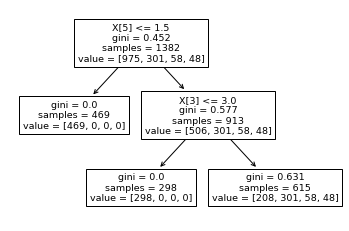

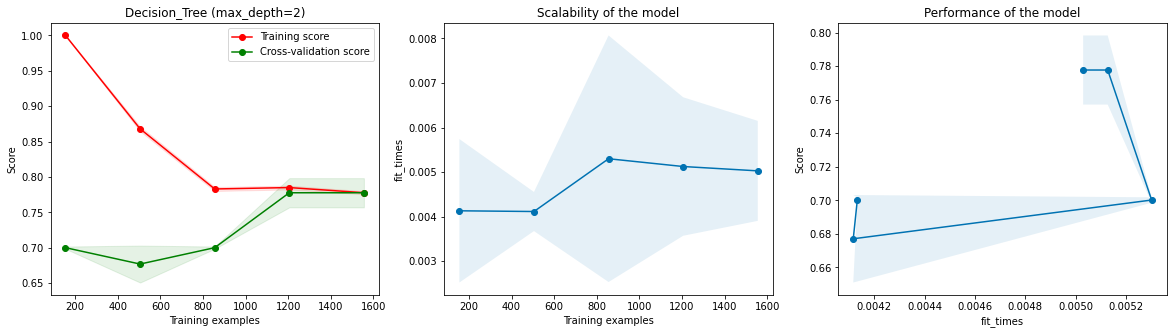

--------------------------------------------------
max_depth =  3
F1 Score:  0.7742143948081835
Training Accuracy:  0.7865412445730825
Testing Accuracy:  0.8121387283236994
Confusion Matrix
[[231   4   0   0]
 [ 33  50   0   0]
 [  0  11   0   0]
 [  0  17   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       235
           1       0.61      0.60      0.61        83
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        17

    accuracy                           0.81       346
   macro avg       0.37      0.40      0.38       346
weighted avg       0.74      0.81      0.77       346

Cross Validation Score
[0.79768786 0.82080925 0.80346821 0.79190751 0.79190751 0.78612717
 0.82080925 0.76300578 0.79069767 0.75      ]


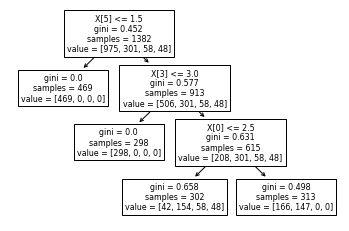

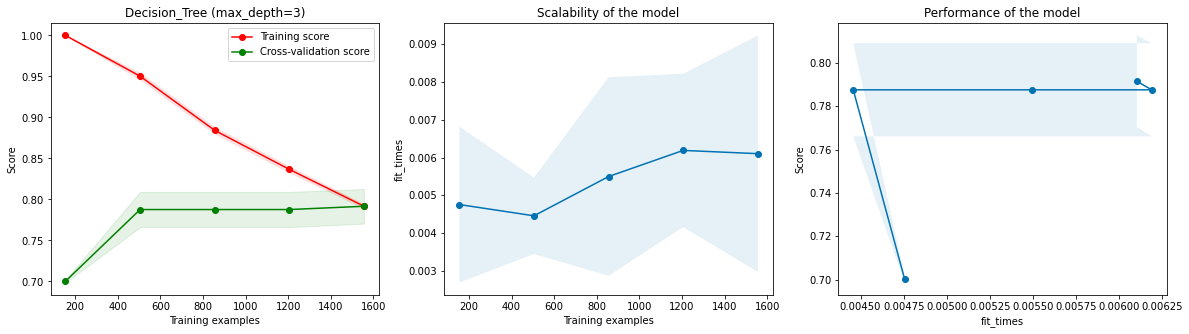

--------------------------------------------------
max_depth =  4
F1 Score:  0.8400804606201033
Training Accuracy:  0.8531114327062229
Testing Accuracy:  0.8410404624277457
Confusion Matrix
[[225  10   0   0]
 [  9  55  19   0]
 [  0   0  11   0]
 [  0   2  15   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       235
           1       0.82      0.66      0.73        83
           2       0.24      1.00      0.39        11
           3       0.00      0.00      0.00        17

    accuracy                           0.84       346
   macro avg       0.51      0.66      0.52       346
weighted avg       0.86      0.84      0.84       346

Cross Validation Score
[0.89595376 0.8150289  0.87861272 0.84393064 0.83815029 0.84393064
 0.85549133 0.8265896  0.86046512 0.84883721]


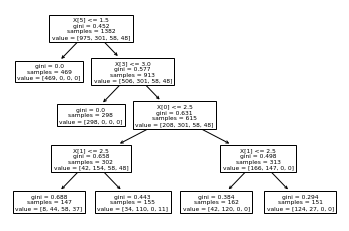

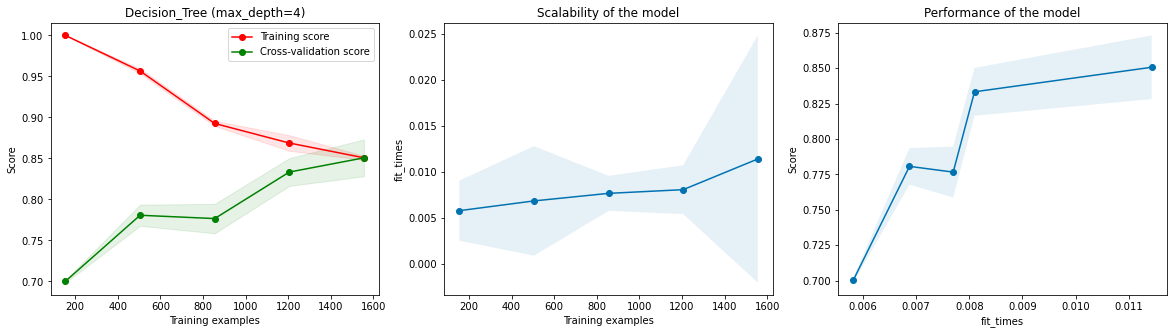

--------------------------------------------------
max_depth =  5
F1 Score:  0.8789974238757907
Training Accuracy:  0.8668596237337193
Testing Accuracy:  0.8901734104046243
Confusion Matrix
[[225  10   0   0]
 [  9  68   0   6]
 [  0   6   0   5]
 [  0   2   0  15]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       235
           1       0.79      0.82      0.80        83
           2       0.00      0.00      0.00        11
           3       0.58      0.88      0.70        17

    accuracy                           0.89       346
   macro avg       0.58      0.66      0.62       346
weighted avg       0.87      0.89      0.88       346

Cross Validation Score
[0.89017341 0.86705202 0.88439306 0.86127168 0.9017341  0.86705202
 0.89595376 0.84971098 0.88953488 0.85465116]


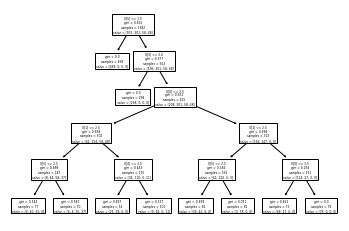

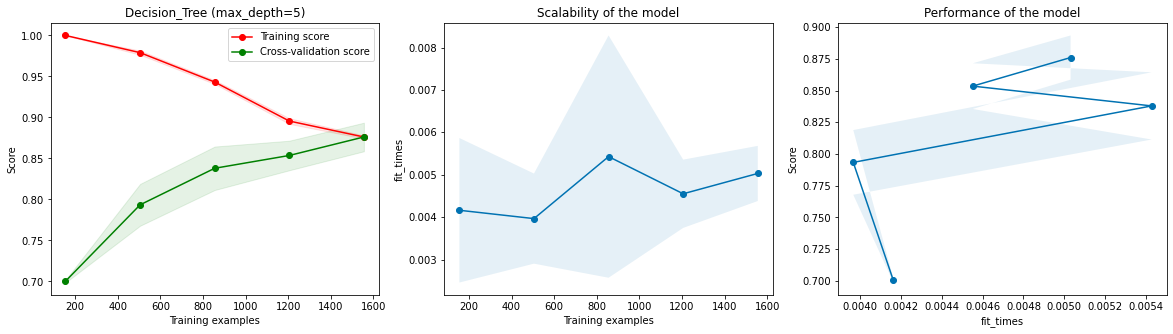

--------------------------------------------------
max_depth =  6
F1 Score:  0.9429336661116987
Training Accuracy:  0.9334298118668596
Testing Accuracy:  0.9393063583815029
Confusion Matrix
[[234   1   0   0]
 [  3  67  11   2]
 [  0   0   9   2]
 [  0   2   0  15]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       235
           1       0.96      0.81      0.88        83
           2       0.45      0.82      0.58        11
           3       0.79      0.88      0.83        17

    accuracy                           0.94       346
   macro avg       0.80      0.88      0.82       346
weighted avg       0.95      0.94      0.94       346

Cross Validation Score
[0.91907514 0.91907514 0.94797688 0.92485549 0.90751445 0.95953757
 0.94797688 0.92485549 0.94767442 0.94767442]


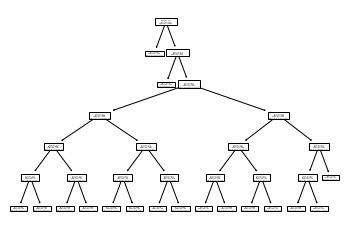

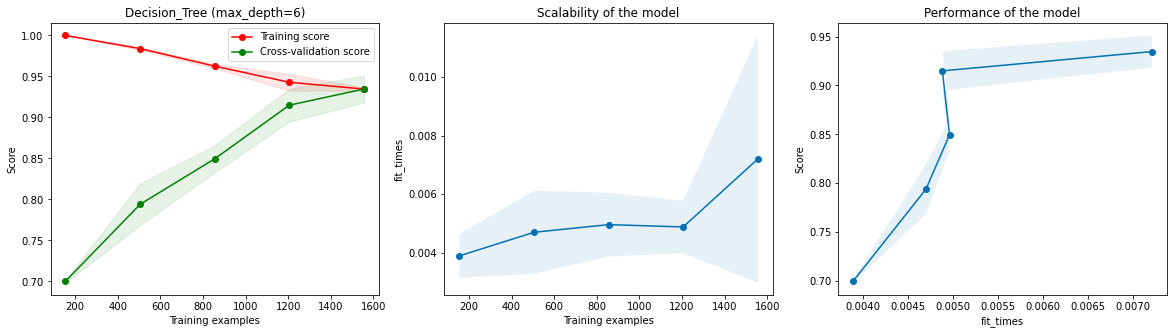

--------------------------------------------------
max_depth =  7
F1 Score:  0.9218735756409447
Training Accuracy:  0.9413892908827786
Testing Accuracy:  0.9219653179190751
Confusion Matrix
[[234   1   0   0]
 [  9  64   8   2]
 [  0   3   6   2]
 [  0   2   0  15]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       235
           1       0.91      0.77      0.84        83
           2       0.43      0.55      0.48        11
           3       0.79      0.88      0.83        17

    accuracy                           0.92       346
   macro avg       0.77      0.80      0.78       346
weighted avg       0.93      0.92      0.92       346

Cross Validation Score
[0.90751445 0.88439306 0.92485549 0.93641618 0.89017341 0.93063584
 0.91907514 0.89595376 0.9244186  0.90697674]


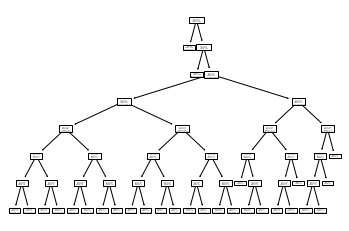

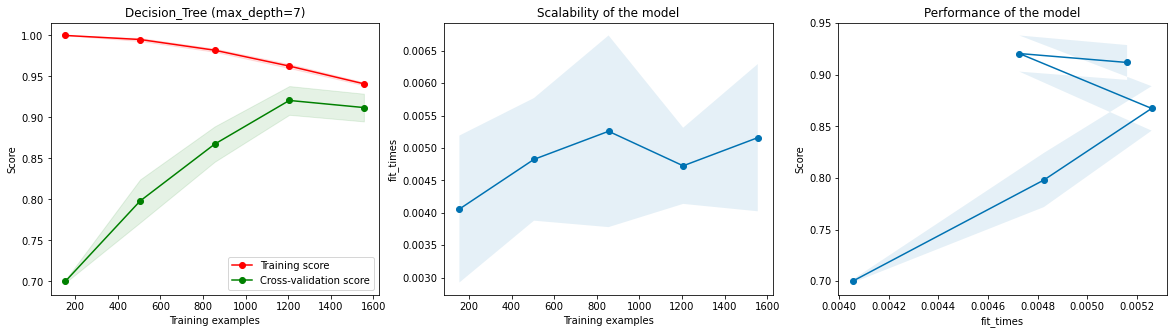

--------------------------------------------------
max_depth =  8
F1 Score:  0.9541451472522517
Training Accuracy:  0.9826338639652678
Testing Accuracy:  0.9479768786127167
Confusion Matrix
[[235   0   0   0]
 [  3  67  13   0]
 [  0   0  11   0]
 [  0   0   2  15]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       235
           1       1.00      0.81      0.89        83
           2       0.42      1.00      0.59        11
           3       1.00      0.88      0.94        17

    accuracy                           0.95       346
   macro avg       0.85      0.92      0.85       346
weighted avg       0.97      0.95      0.95       346

Cross Validation Score
[0.95953757 0.94797688 0.98265896 0.98843931 0.94797688 0.96531792
 0.95953757 0.96531792 0.98255814 0.97674419]


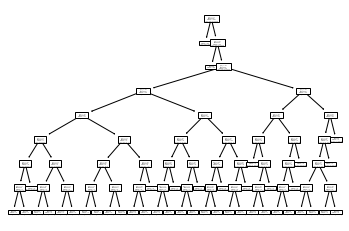

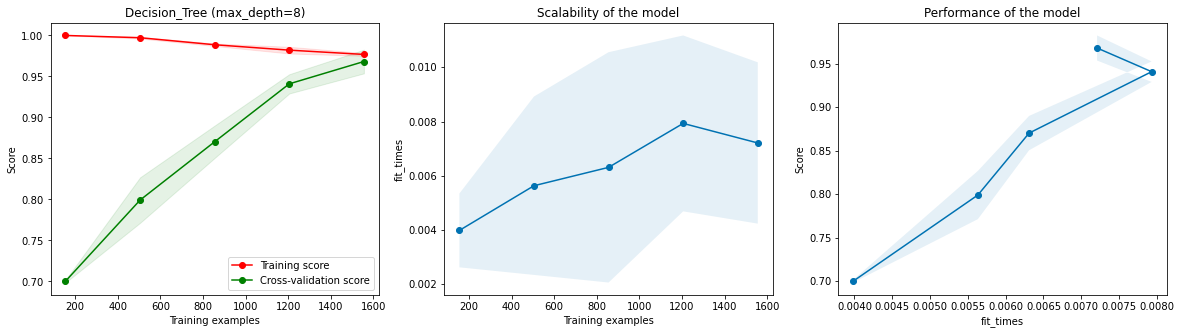

--------------------------------------------------
max_depth =  9
F1 Score:  0.9524431849935575
Training Accuracy:  0.9876989869753979
Testing Accuracy:  0.9508670520231214
Confusion Matrix
[[235   0   0   0]
 [  6  70   7   0]
 [  0   0  11   0]
 [  0   2   2  13]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       235
           1       0.97      0.84      0.90        83
           2       0.55      1.00      0.71        11
           3       1.00      0.76      0.87        17

    accuracy                           0.95       346
   macro avg       0.87      0.90      0.87       346
weighted avg       0.96      0.95      0.95       346

Cross Validation Score
[0.96531792 0.92485549 0.95375723 0.95953757 0.96531792 0.95375723
 0.96531792 0.96531792 0.97093023 0.97093023]


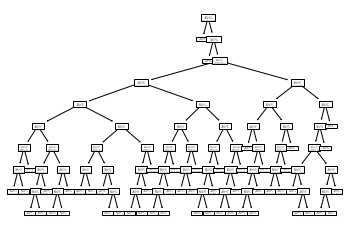

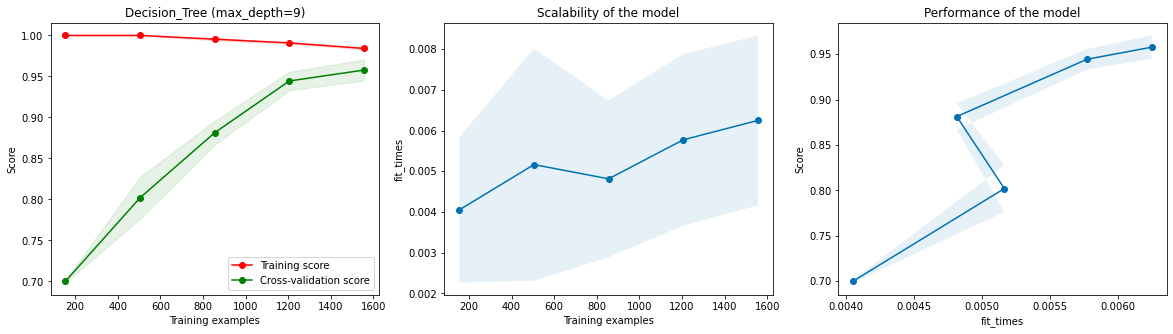

--------------------------------------------------
max_depth =  10
F1 Score:  0.9747376068853647
Training Accuracy:  0.9963820549927641
Testing Accuracy:  0.9739884393063584
Confusion Matrix
[[235   0   0   0]
 [  3  75   5   0]
 [  0   0  11   0]
 [  0   1   0  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       235
           1       0.99      0.90      0.94        83
           2       0.69      1.00      0.81        11
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.92      0.96      0.93       346
weighted avg       0.98      0.97      0.97       346

Cross Validation Score
[0.97687861 0.97109827 0.97687861 0.98265896 0.98843931 0.97109827
 0.98265896 0.97109827 1.         0.97093023]


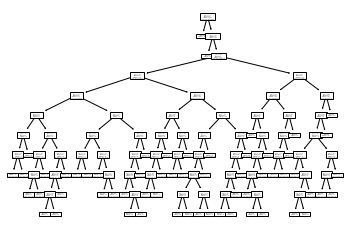

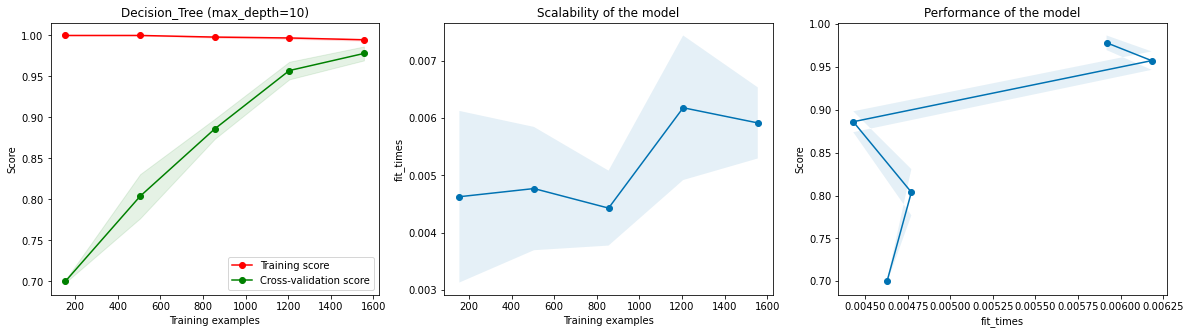

--------------------------------------------------
max_depth =  11
F1 Score:  0.9644752051546855
Training Accuracy:  0.9985528219971056
Testing Accuracy:  0.9624277456647399
Confusion Matrix
[[235   0   0   0]
 [  3  74   6   0]
 [  0   1  10   0]
 [  0   1   2  14]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       235
           1       0.97      0.89      0.93        83
           2       0.56      0.91      0.69        11
           3       1.00      0.82      0.90        17

    accuracy                           0.96       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.97      0.96      0.96       346

Cross Validation Score
[0.97687861 0.97687861 0.97687861 0.98843931 0.99421965 0.97687861
 0.98265896 0.97109827 0.99418605 0.97674419]


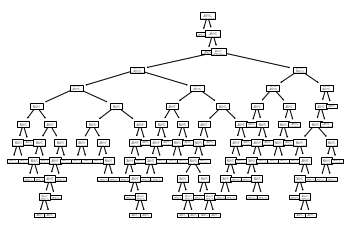

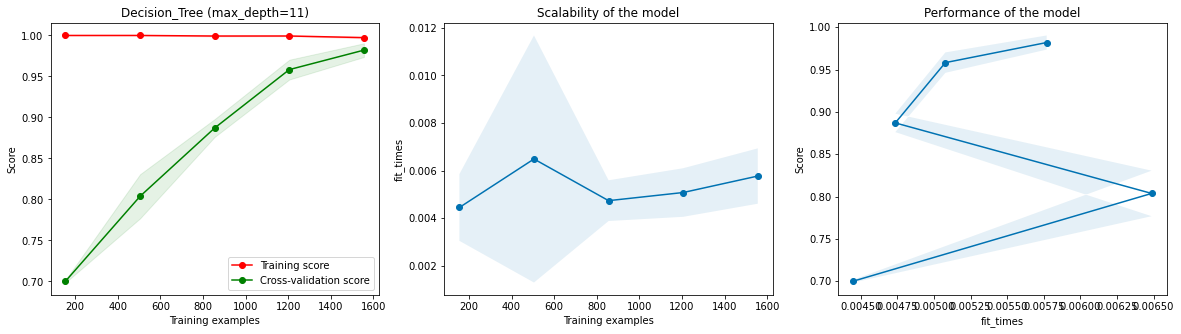

--------------------------------------------------
max_depth =  12
F1 Score:  0.9644752051546855
Training Accuracy:  1.0
Testing Accuracy:  0.9624277456647399
Confusion Matrix
[[235   0   0   0]
 [  3  74   6   0]
 [  0   1  10   0]
 [  0   1   2  14]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       235
           1       0.97      0.89      0.93        83
           2       0.56      0.91      0.69        11
           3       1.00      0.82      0.90        17

    accuracy                           0.96       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.97      0.96      0.96       346

Cross Validation Score
[0.97687861 0.97687861 0.97687861 0.97687861 0.99421965 0.98265896
 0.98265896 0.97109827 1.         0.97674419]


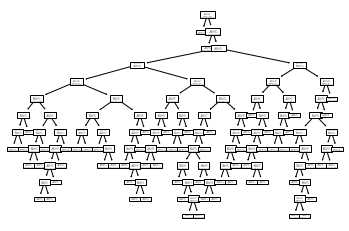

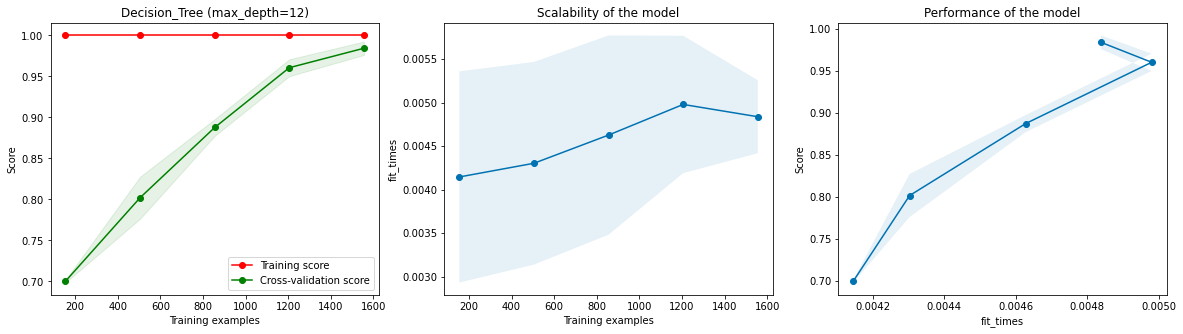

--------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [22]:
task = "Decision_Tree"
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

f1 = []
train_acc = []
test_acc = []
params = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in params:
    print("max_depth = ", k)
    clf = DecisionTreeClassifier(max_depth = k)
    fit_tree = clf.fit(x_train, y_train)
    
    # See the tree
    tree.plot_tree(fit_tree) 
    plt.savefig(f'car_plots/learning_curve_{task}_tree_{k}.png')
    
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10)
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    plot_learning_curve(clf, f"{task} (max_depth={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.show()
    plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
    
    print("--------------------------------------------------")

# 2 Neural Networks

max_depth =  ((100, 50, 25), 'relu')
F1 Score:  0.9825136571742299
Training Accuracy:  0.9956584659913169
Testing Accuracy:  0.9826589595375722
Confusion Matrix
[[235   0   0   0]
 [  3  78   1   1]
 [  0   1  10   0]
 [  0   0   0  17]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       235
           1       0.99      0.94      0.96        83
           2       0.91      0.91      0.91        11
           3       0.94      1.00      0.97        17

    accuracy                           0.98       346
   macro avg       0.96      0.96      0.96       346
weighted avg       0.98      0.98      0.98       346

Cross Validation Score
[0.98843931 0.98843931 0.98843931 0.98265896 0.97687861 0.97109827
 0.98843931 0.97109827 0.98255814 0.98837209]


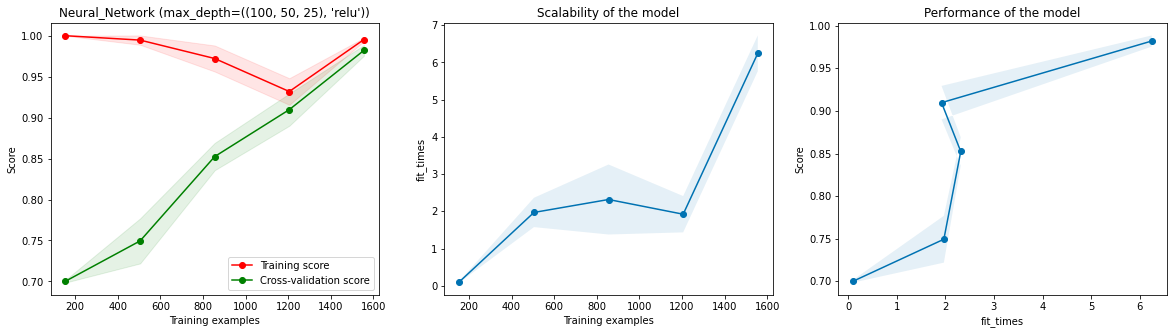

--------------------------------------------------
max_depth =  ((80, 40, 20), 'relu')
F1 Score:  0.9770993520544483
Training Accuracy:  0.9884225759768451
Testing Accuracy:  0.976878612716763
Confusion Matrix
[[234   1   0   0]
 [  3  77   3   0]
 [  0   1  10   0]
 [  0   0   0  17]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       235
           1       0.97      0.93      0.95        83
           2       0.77      0.91      0.83        11
           3       1.00      1.00      1.00        17

    accuracy                           0.98       346
   macro avg       0.93      0.96      0.94       346
weighted avg       0.98      0.98      0.98       346

Cross Validation Score
[0.99421965 1.         0.98843931 0.98265896 0.96531792 0.94797688
 0.98265896 0.97687861 0.95930233 0.96511628]


<Figure size 432x288 with 0 Axes>

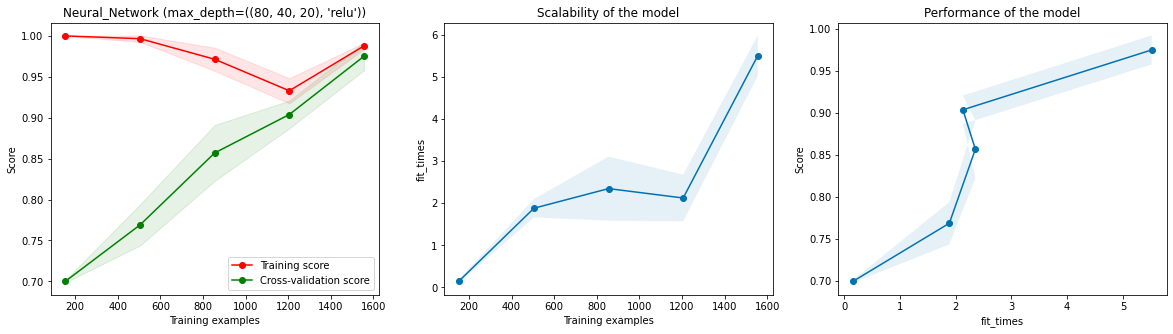

--------------------------------------------------
max_depth =  ((50, 100, 150), 'relu')
F1 Score:  0.9856168855765933
Training Accuracy:  1.0
Testing Accuracy:  0.9855491329479769
Confusion Matrix
[[235   0   0   0]
 [  2  79   2   0]
 [  0   1  10   0]
 [  0   0   0  17]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       235
           1       0.99      0.95      0.97        83
           2       0.83      0.91      0.87        11
           3       1.00      1.00      1.00        17

    accuracy                           0.99       346
   macro avg       0.95      0.97      0.96       346
weighted avg       0.99      0.99      0.99       346

Cross Validation Score
[0.98843931 0.98265896 0.98843931 0.98265896 0.97687861 0.98843931
 0.99421965 0.97687861 0.99418605 0.98837209]


<Figure size 432x288 with 0 Axes>

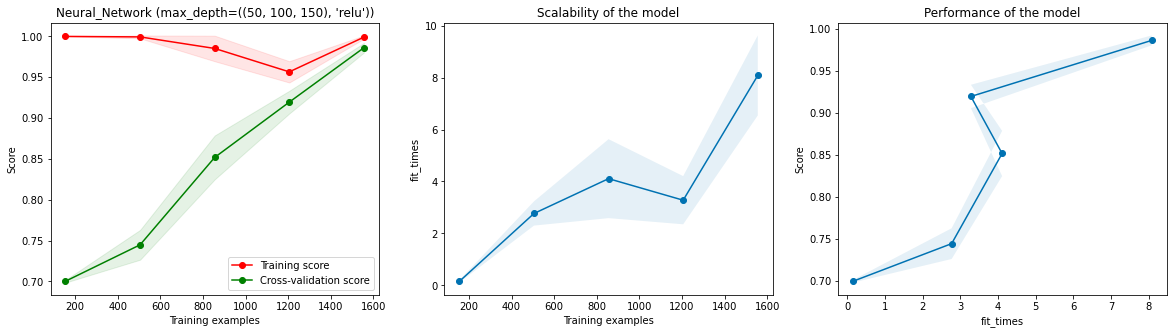

--------------------------------------------------
max_depth =  ((100, 150, 50), 'relu')
F1 Score:  0.9827509154301345
Training Accuracy:  0.9992764109985528
Testing Accuracy:  0.9826589595375722
Confusion Matrix
[[234   1   0   0]
 [  2  79   2   0]
 [  0   1  10   0]
 [  0   0   0  17]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       235
           1       0.98      0.95      0.96        83
           2       0.83      0.91      0.87        11
           3       1.00      1.00      1.00        17

    accuracy                           0.98       346
   macro avg       0.95      0.96      0.96       346
weighted avg       0.98      0.98      0.98       346

Cross Validation Score
[0.99421965 0.96531792 0.98843931 1.         0.97687861 0.98843931
 0.98843931 0.96531792 0.99418605 0.98837209]


<Figure size 432x288 with 0 Axes>

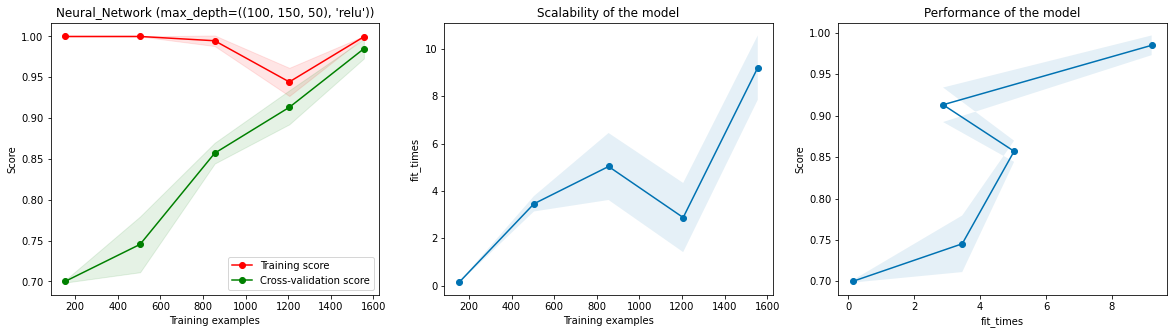

--------------------------------------------------
max_depth =  ((100, 100, 100), 'relu')
F1 Score:  0.9710703206386962
Training Accuracy:  1.0
Testing Accuracy:  0.9710982658959537
Confusion Matrix
[[235   0   0   0]
 [  5  75   3   0]
 [  0   1  10   0]
 [  0   1   0  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       235
           1       0.97      0.90      0.94        83
           2       0.77      0.91      0.83        11
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.93      0.94      0.93       346
weighted avg       0.97      0.97      0.97       346

Cross Validation Score
[0.99421965 0.98265896 1.         0.99421965 0.98265896 0.98843931
 0.97687861 0.98265896 0.97674419 0.96511628]


<Figure size 432x288 with 0 Axes>

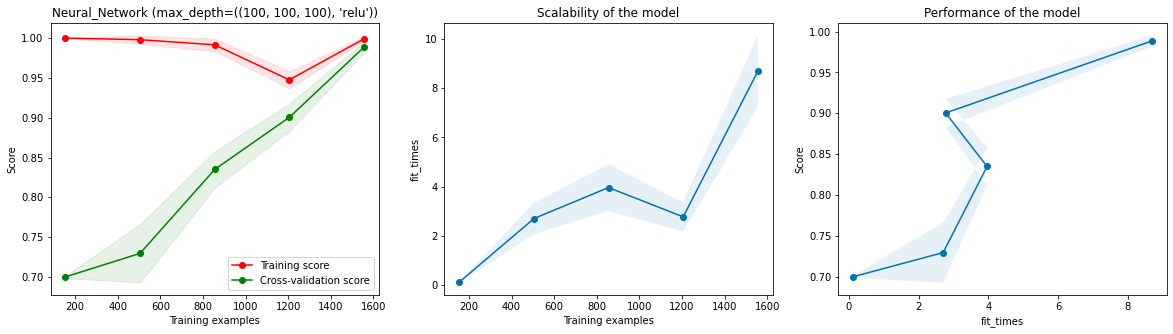

--------------------------------------------------
max_depth =  ((50, 50, 50), 'relu')
F1 Score:  0.971259889424711
Training Accuracy:  0.9992764109985528
Testing Accuracy:  0.9710982658959537
Confusion Matrix
[[233   2   0   0]
 [  4  76   3   0]
 [  0   1  10   0]
 [  0   0   0  17]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       235
           1       0.96      0.92      0.94        83
           2       0.77      0.91      0.83        11
           3       1.00      1.00      1.00        17

    accuracy                           0.97       346
   macro avg       0.93      0.95      0.94       346
weighted avg       0.97      0.97      0.97       346

Cross Validation Score
[0.98265896 0.96531792 1.         0.97109827 0.98265896 0.97687861
 0.98843931 0.97687861 0.97674419 0.97674419]


<Figure size 432x288 with 0 Axes>

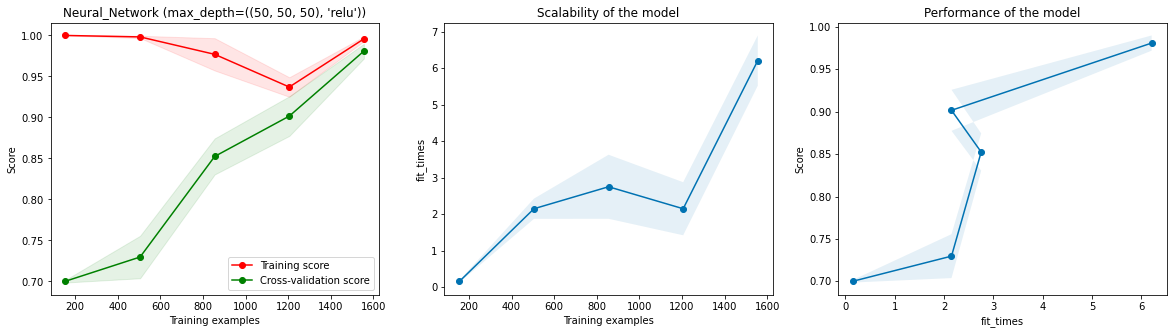

--------------------------------------------------
max_depth =  ((10, 10, 10), 'relu')
F1 Score:  0.9179618944838555
Training Accuracy:  0.9384949348769899
Testing Accuracy:  0.9190751445086706
Confusion Matrix
[[230   5   0   0]
 [ 11  68   2   2]
 [  0   2   8   1]
 [  0   3   2  12]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       235
           1       0.87      0.82      0.84        83
           2       0.67      0.73      0.70        11
           3       0.80      0.71      0.75        17

    accuracy                           0.92       346
   macro avg       0.82      0.81      0.81       346
weighted avg       0.92      0.92      0.92       346

Cross Validation Score
[0.95375723 0.90751445 0.93641618 0.94219653 0.94219653 0.9132948
 0.93641618 0.9017341  0.89534884 0.93604651]


<Figure size 432x288 with 0 Axes>

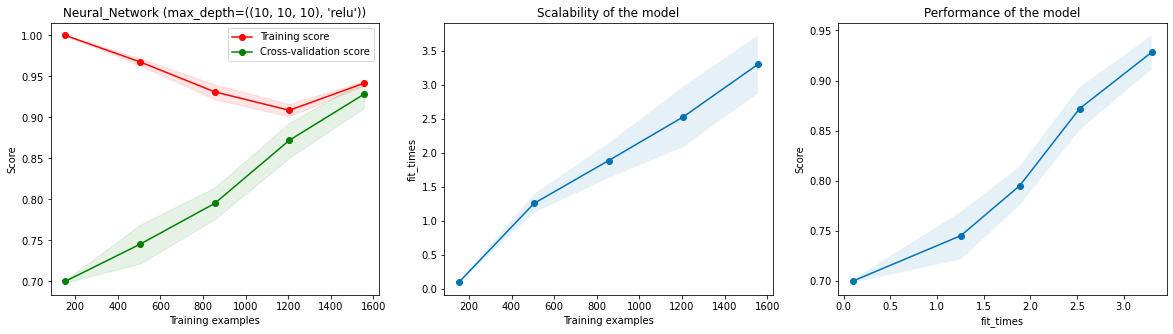

--------------------------------------------------
max_depth =  ((5, 5, 5), 'relu')
F1 Score:  0.8971683711092555
Training Accuracy:  0.9167872648335745
Testing Accuracy:  0.9017341040462428
Confusion Matrix
[[229   6   0   0]
 [ 11  70   1   1]
 [  0   2   2   7]
 [  0   3   3  11]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       235
           1       0.86      0.84      0.85        83
           2       0.33      0.18      0.24        11
           3       0.58      0.65      0.61        17

    accuracy                           0.90       346
   macro avg       0.68      0.66      0.67       346
weighted avg       0.89      0.90      0.90       346

Cross Validation Score
[0.91907514 0.82080925 0.90751445 0.9132948  0.89017341 0.90751445
 0.91907514 0.9017341  0.88953488 0.9127907 ]


<Figure size 432x288 with 0 Axes>

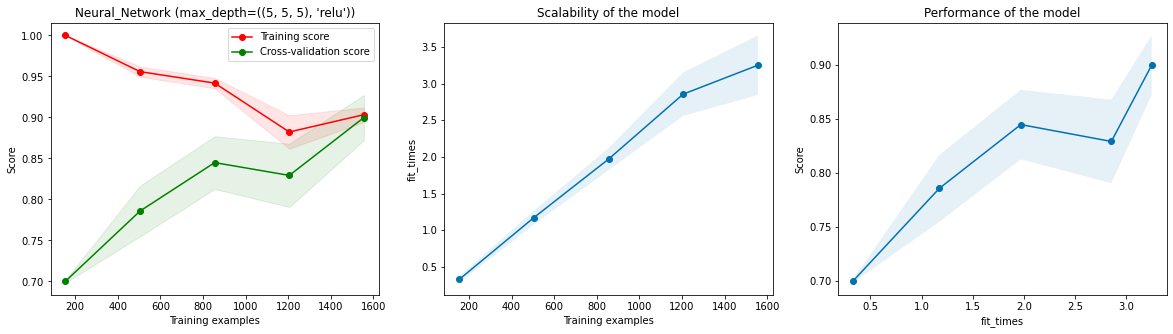

--------------------------------------------------
max_depth =  ((150, 100, 50), 'relu')
F1 Score:  0.9800327608720711
Training Accuracy:  0.9992764109985528
Testing Accuracy:  0.9797687861271677
Confusion Matrix
[[235   0   0   0]
 [  2  78   3   0]
 [  0   1  10   0]
 [  0   1   0  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       235
           1       0.97      0.94      0.96        83
           2       0.77      0.91      0.83        11
           3       1.00      0.94      0.97        17

    accuracy                           0.98       346
   macro avg       0.93      0.95      0.94       346
weighted avg       0.98      0.98      0.98       346

Cross Validation Score
[0.99421965 0.99421965 1.         0.99421965 0.97687861 0.98843931
 0.99421965 0.97687861 0.99418605 0.95930233]


<Figure size 432x288 with 0 Axes>

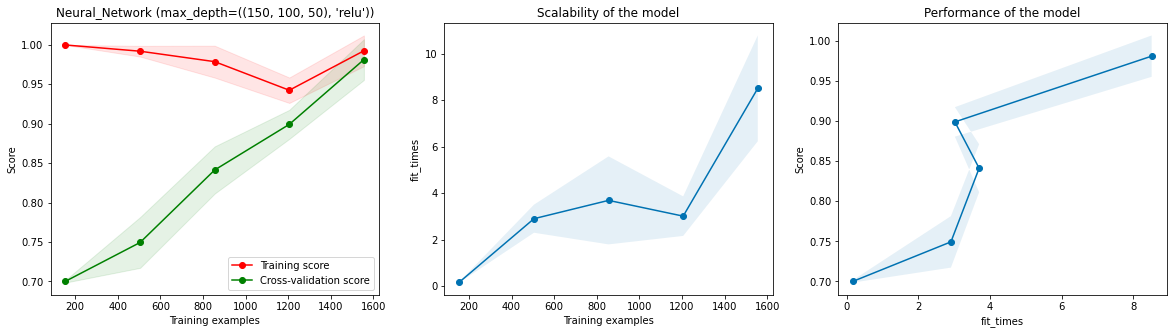

--------------------------------------------------
max_depth =  ((150, 100, 50), 'tanh')
F1 Score:  0.9885496760272239
Training Accuracy:  1.0
Testing Accuracy:  0.9884393063583815
Confusion Matrix
[[235   0   0   0]
 [  2  79   2   0]
 [  0   0  11   0]
 [  0   0   0  17]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       235
           1       1.00      0.95      0.98        83
           2       0.85      1.00      0.92        11
           3       1.00      1.00      1.00        17

    accuracy                           0.99       346
   macro avg       0.96      0.99      0.97       346
weighted avg       0.99      0.99      0.99       346

Cross Validation Score
[0.99421965 1.         1.         1.         0.99421965 0.99421965
 0.99421965 0.98265896 1.         1.        ]


<Figure size 432x288 with 0 Axes>

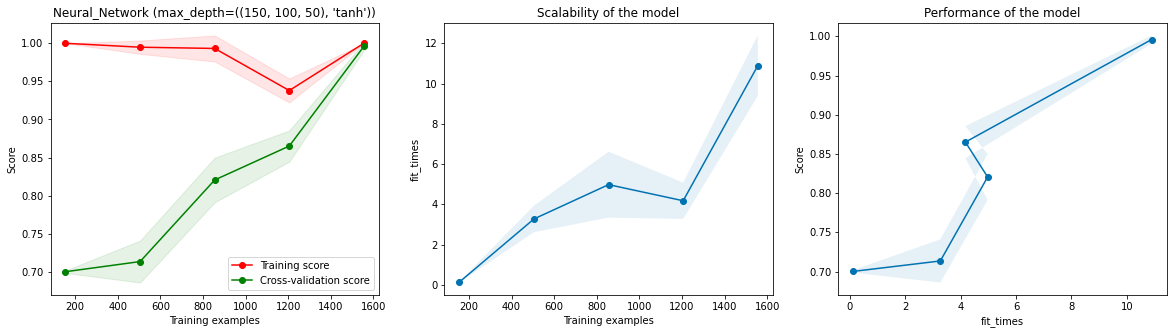

--------------------------------------------------
max_depth =  ((150, 100, 50), 'logistic')
F1 Score:  0.9183487825479589
Training Accuracy:  0.9319826338639653
Testing Accuracy:  0.9190751445086706
Confusion Matrix
[[228   7   0   0]
 [ 11  68   3   1]
 [  0   1   9   1]
 [  0   4   0  13]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       235
           1       0.85      0.82      0.83        83
           2       0.75      0.82      0.78        11
           3       0.87      0.76      0.81        17

    accuracy                           0.92       346
   macro avg       0.86      0.84      0.85       346
weighted avg       0.92      0.92      0.92       346

Cross Validation Score
[0.94219653 0.88439306 0.94219653 0.95375723 0.93641618 0.92485549
 0.94219653 0.88439306 0.91860465 0.91860465]


<Figure size 432x288 with 0 Axes>

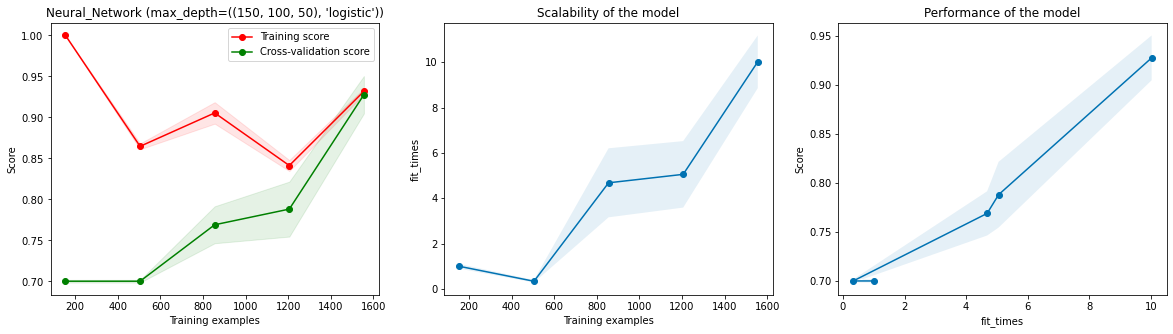

--------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [30]:
task = "Neural_Network"
# Multi-layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

f1 = []
train_acc = []
test_acc = []
params = [
    ((100,50,25), 'relu'),
    ((80,40,20), 'relu'),
    ((50,100,150), 'relu'),
    ((100,150,50), 'relu'),
    ((100,100,100), 'relu'),
    ((50,50,50), 'relu'),
    ((10,10,10), 'relu'),
    ((5,5,5), 'relu'),
    ((15,10,5), 'relu'),
    ((150,100,50), 'tanh'),
    ((150,100,50), 'logistic'), #Sigmoid
]
for k in params:
    print("hidden_layer_sizes = ", k[0], "activation = ", k[1])
    clf = MLPClassifier(hidden_layer_sizes=k[0], max_iter=300,activation = k[1],solver='adam',random_state=1)
    fit_tree = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10)
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    plot_learning_curve(clf, f"{task} (max_depth={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.show()
    plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
    
    print("--------------------------------------------------")

# 3 Boosting

with much more aggressive about pruning

Classifier =  AdaBoost
F1 Score:  0.8331990920034225
Training Accuracy:  0.7771345875542692
Testing Accuracy:  0.8236994219653179
Confusion Matrix
[[206  25   4   0]
 [ 11  54  13   5]
 [  0   1  10   0]
 [  0   1   1  15]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       235
           1       0.67      0.65      0.66        83
           2       0.36      0.91      0.51        11
           3       0.75      0.88      0.81        17

    accuracy                           0.82       346
   macro avg       0.68      0.83      0.72       346
weighted avg       0.85      0.82      0.83       346

Cross Validation Score
[0.79190751 0.72254335 0.78612717 0.79190751 0.75144509 0.77456647
 0.71098266 0.80346821 0.75       0.75      ]


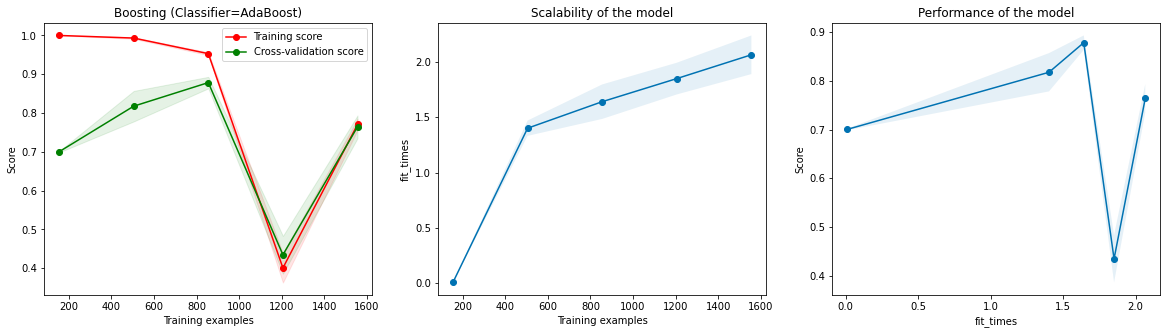

--------------------------------------------------
Classifier =  GradientBoosting
F1 Score:  0.986261643128908
Training Accuracy:  1.0
Testing Accuracy:  0.9855491329479769
Confusion Matrix
[[235   0   0   0]
 [  0  79   4   0]
 [  0   0  11   0]
 [  0   1   0  16]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      0.95      0.97        83
           2       0.73      1.00      0.85        11
           3       1.00      0.94      0.97        17

    accuracy                           0.99       346
   macro avg       0.93      0.97      0.95       346
weighted avg       0.99      0.99      0.99       346

Cross Validation Score
[0.98843931 0.98265896 0.98843931 1.         0.98843931 0.97109827
 0.97687861 0.98265896 0.98837209 1.        ]


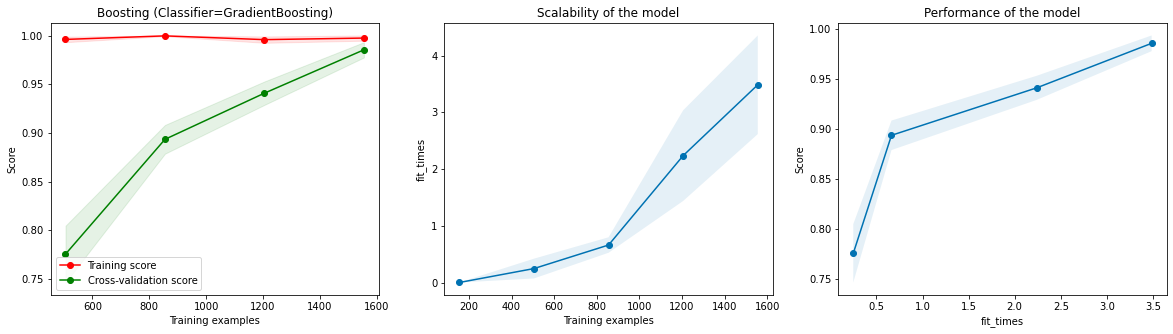

--------------------------------------------------
Classifier =  HistGradientBoosting
F1 Score:  0.9835069694472195
Training Accuracy:  1.0
Testing Accuracy:  0.9826589595375722
Confusion Matrix
[[235   0   0   0]
 [  0  80   3   0]
 [  0   0  11   0]
 [  0   1   2  14]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      0.96      0.98        83
           2       0.69      1.00      0.81        11
           3       1.00      0.82      0.90        17

    accuracy                           0.98       346
   macro avg       0.92      0.95      0.92       346
weighted avg       0.99      0.98      0.98       346

Cross Validation Score
[1.         1.         1.         1.         1.         1.
 1.         0.99421965 1.         0.99418605]


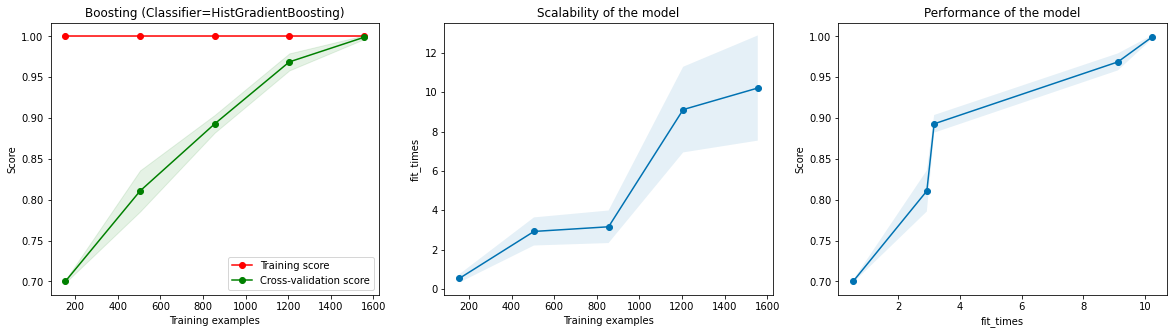

--------------------------------------------------


In [24]:
task = "Boosting"
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)

base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.06)

f1 = []
train_acc = []
test_acc = []
params = ["AdaBoost", "GradientBoosting", "HistGradientBoosting"]

for k, clf in [
    ("AdaBoost", AdaBoostClassifier(base_estimator=base_estim,
                        n_estimators=500,
                        learning_rate=0.5,
                        random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(n_estimators=2000,
                                 subsample=0.67,
                                 max_features=0.06,
                                 validation_fraction=0.1,
                                 n_iter_no_change=15,
                                 verbose=0,
                                 random_state=42)),
    ("HistGradientBoosting", HistGradientBoostingClassifier(max_iter=2000,
                                      validation_fraction=0.1,
                                      n_iter_no_change=15,
                                      verbose=0,
                                      random_state=42))
]:
    print("Classifier = ", k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10)
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])

    plot_learning_curve(clf, f"{task} (Classifier={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")

# 4 Support Vector Machines

with at least two kernel functions

kernel =  linear
F1 Score:  0.8256265098201538
Training Accuracy:  0.8603473227206947
Testing Accuracy:  0.8323699421965318
Confusion Matrix
[[220  14   0   1]
 [ 34  49   0   0]
 [  3   0   8   0]
 [  0   4   2  11]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       235
           1       0.73      0.59      0.65        83
           2       0.80      0.73      0.76        11
           3       0.92      0.65      0.76        17

    accuracy                           0.83       346
   macro avg       0.83      0.73      0.77       346
weighted avg       0.83      0.83      0.83       346

Cross Validation Score
[0.73988439 0.79768786 0.86705202 0.8150289  0.85549133 0.8150289
 0.90751445 0.89017341 0.86627907 0.55813953]


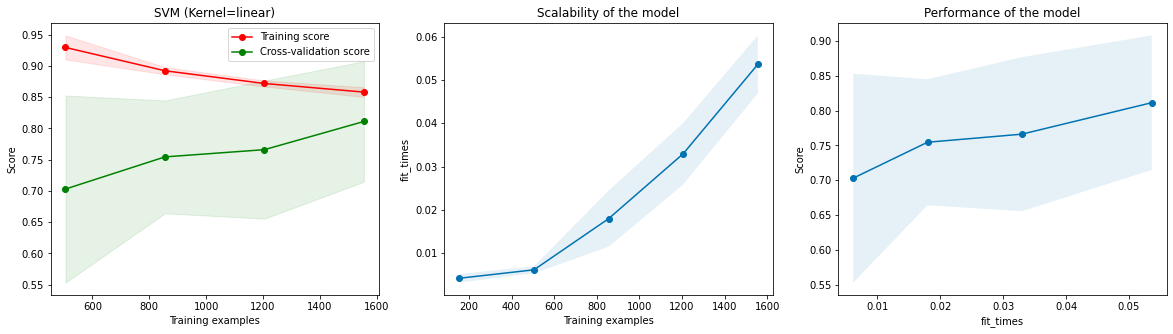

--------------------------------------------------
kernel =  poly
F1 Score:  0.920546636325535
Training Accuracy:  0.9500723589001447
Testing Accuracy:  0.9219653179190751
Confusion Matrix
[[229   6   0   0]
 [ 14  66   3   0]
 [  0   2   8   1]
 [  0   1   0  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       235
           1       0.88      0.80      0.84        83
           2       0.73      0.73      0.73        11
           3       0.94      0.94      0.94        17

    accuracy                           0.92       346
   macro avg       0.87      0.86      0.87       346
weighted avg       0.92      0.92      0.92       346

Cross Validation Score
[0.85549133 0.87861272 0.85549133 0.89595376 0.92485549 0.87283237
 0.97109827 0.96531792 0.91860465 0.80232558]


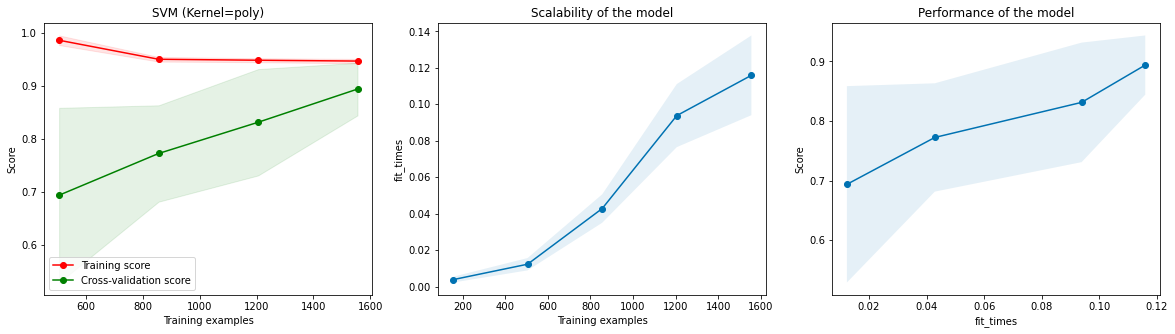

--------------------------------------------------
kernel =  rbf
F1 Score:  0.9470260927682398
Training Accuracy:  0.9544138929088278
Testing Accuracy:  0.9479768786127167
Confusion Matrix
[[234   1   0   0]
 [  8  72   3   0]
 [  0   1  10   0]
 [  0   4   1  12]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       235
           1       0.92      0.87      0.89        83
           2       0.71      0.91      0.80        11
           3       1.00      0.71      0.83        17

    accuracy                           0.95       346
   macro avg       0.90      0.87      0.88       346
weighted avg       0.95      0.95      0.95       346

Cross Validation Score
[0.84393064 0.87283237 0.86127168 0.87861272 0.88439306 0.85549133
 0.93063584 0.97109827 0.93023256 0.86627907]


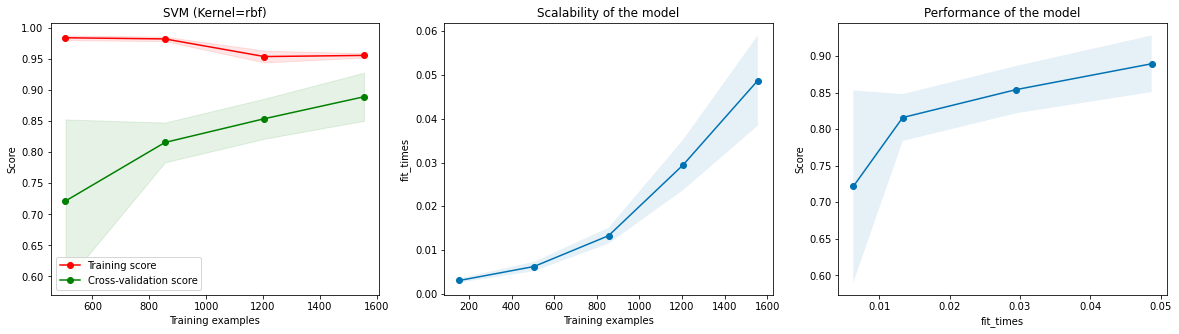

--------------------------------------------------
kernel =  sigmoid
F1 Score:  0.5225826232410979
Training Accuracy:  0.581041968162084
Testing Accuracy:  0.5809248554913294
Confusion Matrix
[[193  42   0   0]
 [ 75   8   0   0]
 [ 11   0   0   0]
 [ 17   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.82      0.73       235
           1       0.16      0.10      0.12        83
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        17

    accuracy                           0.58       346
   macro avg       0.20      0.23      0.21       346
weighted avg       0.48      0.58      0.52       346

Cross Validation Score
[0.69364162 0.67052023 0.69942197 0.67630058 0.69942197 0.69942197
 0.69942197 0.69942197 0.70348837 0.30813953]


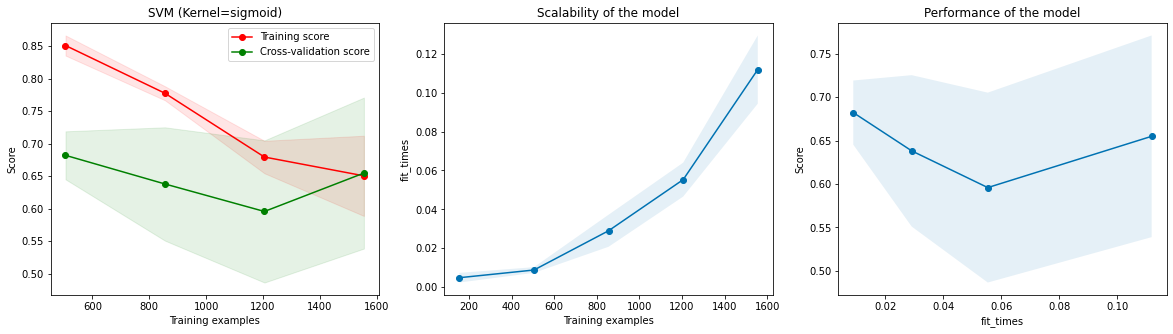

--------------------------------------------------


In [33]:
task = "SVM"
from sklearn import svm

for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    print("kernel = ", k)
    clf = svm.SVC(decision_function_shape='ovo', kernel=k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10)
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])
    
    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])

    plot_learning_curve(clf, f"{task} (Kernel={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")

## Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV
# Grid Search
task = "SVM"
k = "rbf_gridsearch"
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, verbose=1, cv=10)

# Train the classifier
clf_grid.fit(x_train, y_train)

y_pred = clf_grid.predict(x_test)
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf_grid.score(x_train, y_train),
        "testing_acc": clf_grid.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf_grid, x, y, cv=10),
        "best_parameters": clf_grid.best_params_,
        "best_estimators": clf_grid.best_estimator_
    }
k = clf_grid.best_params_

print("F1 Score: ", result[task][k]["f1"])
print("Training Accuracy: ", result[task][k]["training_acc"])
print("Testing Accuracy: ", result[task][k]["testing_acc"])
print("Confusion Matrix")
print(result[task][k]["confusion_mat"])
print("Classification Report")
print(result[task][k]["classification_report"])
print("Cross Validation Score")
print(result[task][k]["cross_validation_score"])
    
# Add to lists
f1.append(result[task][k]["f1"])
train_acc.append(result[task][k]["training_acc"])
test_acc.append(result[task][k]["testing_acc"])

plot_learning_curve(clf, f"{task} (Kernel={k})", x, y, axes=None, cv=10, n_jobs=4)
plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
plt.show()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   13.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameters:
 {'C': 100, 'gamma': 0.1}
Best Estimators:
 SVC(C=100, gamma=0.1)
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   17.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   18.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   18.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   19.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   17.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   17.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   18.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   18.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   19.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   17.2s finished


TypeError: unhashable type: 'dict'

# 5 K-Nearest Neighbors

with different values of k

K =  1
F1 Score:  0.8327930379862439
Training Accuracy:  1.0
Testing Accuracy:  0.8294797687861272
Confusion Matrix
[[220  15   0   0]
 [ 16  52  11   4]
 [  2   2   5   2]
 [  0   3   4  10]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       235
           1       0.72      0.63      0.67        83
           2       0.25      0.45      0.32        11
           3       0.62      0.59      0.61        17

    accuracy                           0.83       346
   macro avg       0.63      0.65      0.63       346
weighted avg       0.84      0.83      0.83       346

Cross Validation Score
[0.88439306 0.9132948  0.84971098 0.86127168 0.8150289  0.86127168
 0.83236994 0.88439306 0.81395349 0.86046512]


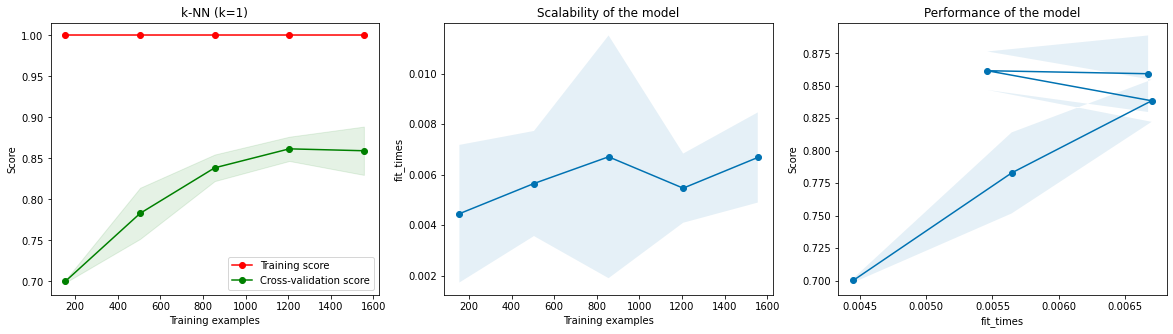

--------------------------------------------------
K =  2
F1 Score:  0.8288758009888946
Training Accuracy:  0.9392185238784371
Testing Accuracy:  0.8410404624277457
Confusion Matrix
[[233   2   0   0]
 [ 30  48   4   1]
 [  4   2   5   0]
 [  0   4   8   5]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       235
           1       0.86      0.58      0.69        83
           2       0.29      0.45      0.36        11
           3       0.83      0.29      0.43        17

    accuracy                           0.84       346
   macro avg       0.71      0.58      0.60       346
weighted avg       0.85      0.84      0.83       346

Cross Validation Score
[0.88439306 0.86127168 0.89017341 0.86127168 0.89595376 0.86705202
 0.89017341 0.89017341 0.83139535 0.84883721]


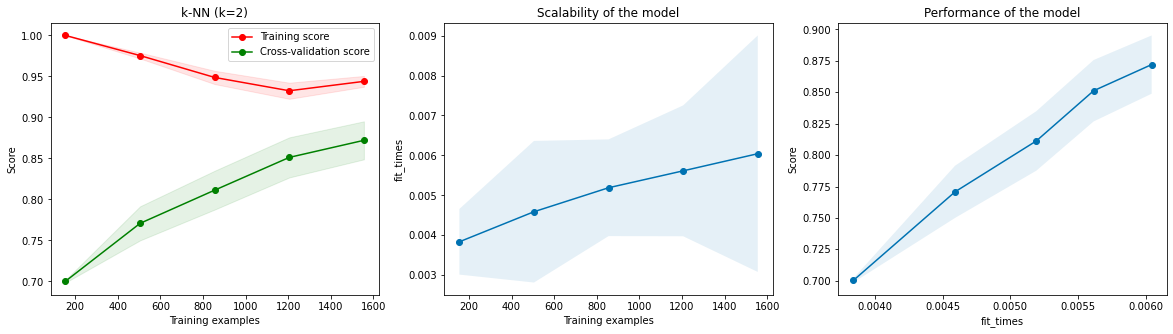

--------------------------------------------------
K =  3
F1 Score:  0.8797147955382925
Training Accuracy:  0.9609261939218524
Testing Accuracy:  0.884393063583815
Confusion Matrix
[[231   4   0   0]
 [ 18  61   3   1]
 [  3   3   5   0]
 [  0   4   4   9]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       235
           1       0.85      0.73      0.79        83
           2       0.42      0.45      0.43        11
           3       0.90      0.53      0.67        17

    accuracy                           0.88       346
   macro avg       0.77      0.68      0.71       346
weighted avg       0.88      0.88      0.88       346

Cross Validation Score
[0.90751445 0.89595376 0.87861272 0.90751445 0.90751445 0.89595376
 0.90751445 0.9017341  0.88953488 0.91860465]


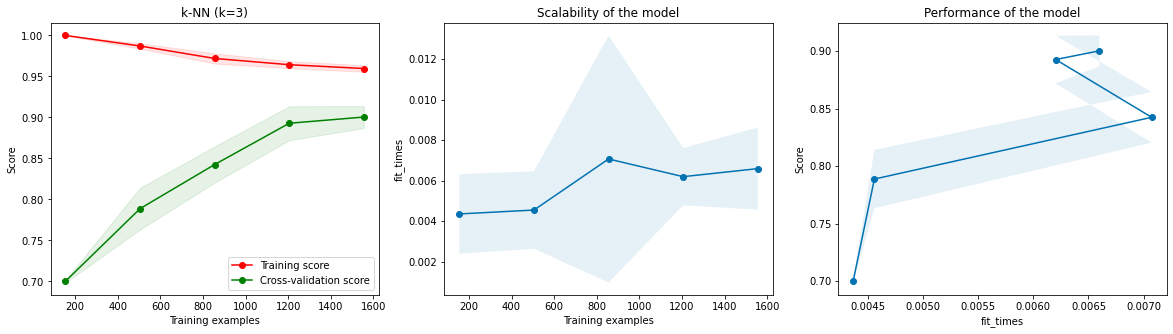

--------------------------------------------------
K =  4
F1 Score:  0.8908516474404585
Training Accuracy:  0.9486251808972503
Testing Accuracy:  0.8959537572254336
Confusion Matrix
[[235   0   0   0]
 [ 17  60   6   0]
 [  1   1   9   0]
 [  0   5   6   6]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       235
           1       0.91      0.72      0.81        83
           2       0.43      0.82      0.56        11
           3       1.00      0.35      0.52        17

    accuracy                           0.90       346
   macro avg       0.82      0.72      0.71       346
weighted avg       0.91      0.90      0.89       346

Cross Validation Score
[0.94219653 0.87861272 0.90751445 0.88439306 0.9132948  0.9017341
 0.90751445 0.9132948  0.88953488 0.93023256]


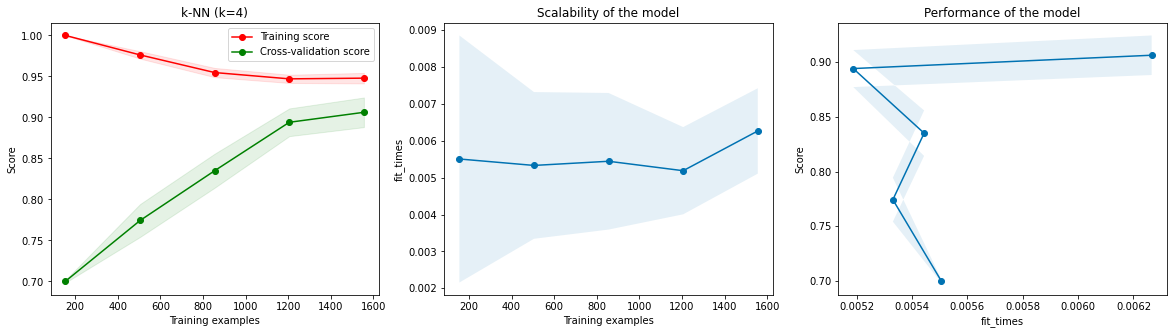

--------------------------------------------------
K =  5
F1 Score:  0.9366879583642589
Training Accuracy:  0.9732272069464544
Testing Accuracy:  0.9393063583815029
Confusion Matrix
[[235   0   0   0]
 [ 10  72   1   0]
 [  1   3   7   0]
 [  0   4   2  11]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       235
           1       0.91      0.87      0.89        83
           2       0.70      0.64      0.67        11
           3       1.00      0.65      0.79        17

    accuracy                           0.94       346
   macro avg       0.89      0.79      0.83       346
weighted avg       0.94      0.94      0.94       346

Cross Validation Score
[0.96531792 0.94219653 0.94219653 0.93063584 0.94797688 0.93641618
 0.96531792 0.95375723 0.94186047 0.95348837]


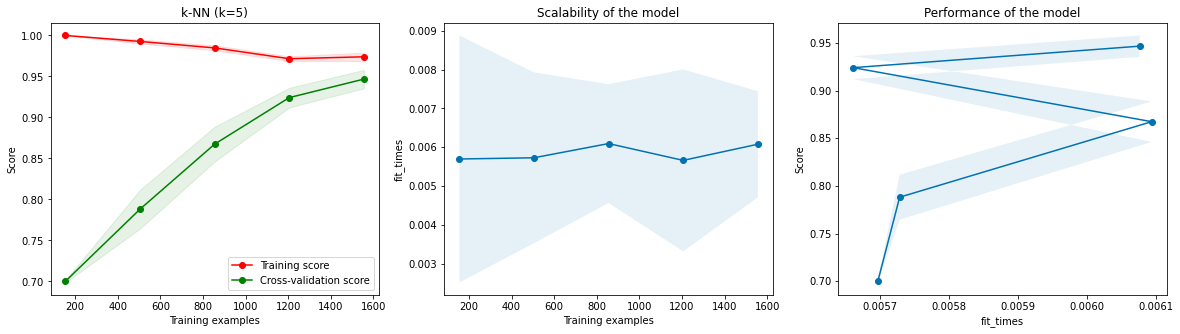

--------------------------------------------------
K =  6
F1 Score:  0.9058628884934201
Training Accuracy:  0.9659913169319826
Testing Accuracy:  0.9104046242774566
Confusion Matrix
[[234   1   0   0]
 [ 18  64   1   0]
 [  1   4   6   0]
 [  0   4   2  11]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       235
           1       0.88      0.77      0.82        83
           2       0.67      0.55      0.60        11
           3       1.00      0.65      0.79        17

    accuracy                           0.91       346
   macro avg       0.87      0.74      0.79       346
weighted avg       0.91      0.91      0.91       346

Cross Validation Score
[0.95375723 0.93063584 0.94219653 0.93063584 0.95953757 0.94219653
 0.95953757 0.93063584 0.9244186  0.94186047]


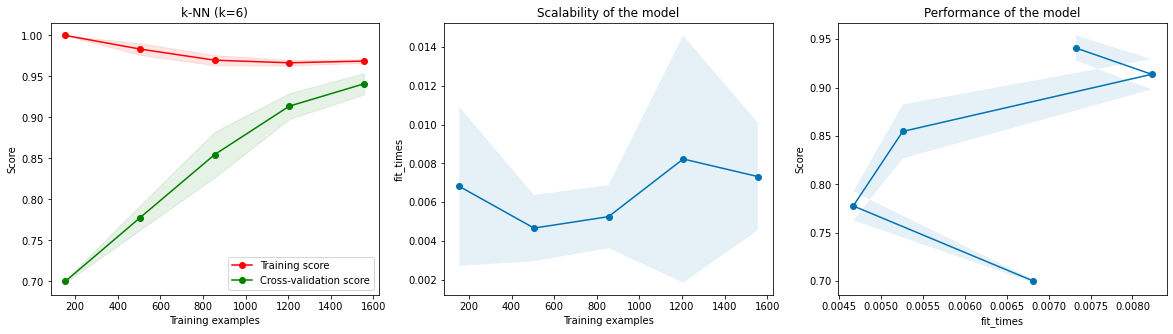

--------------------------------------------------
K =  7
F1 Score:  0.9174884644112798
Training Accuracy:  0.975397973950796
Testing Accuracy:  0.9190751445086706
Confusion Matrix
[[230   5   0   0]
 [ 11  70   2   0]
 [  0   3   8   0]
 [  0   4   3  10]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       235
           1       0.85      0.84      0.85        83
           2       0.62      0.73      0.67        11
           3       1.00      0.59      0.74        17

    accuracy                           0.92       346
   macro avg       0.86      0.78      0.81       346
weighted avg       0.92      0.92      0.92       346

Cross Validation Score
[0.98265896 0.97109827 0.93641618 0.94219653 0.95953757 0.95953757
 0.97109827 0.94797688 0.94186047 0.95348837]


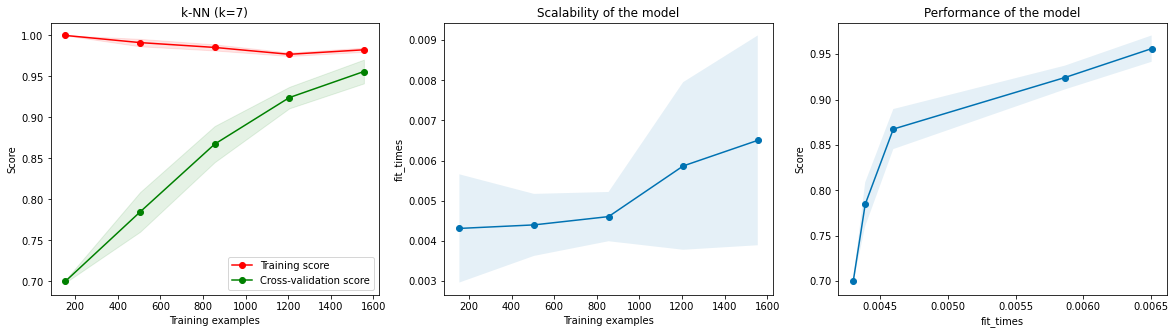

--------------------------------------------------
K =  9
F1 Score:  0.9232149622698584
Training Accuracy:  0.9623733719247467
Testing Accuracy:  0.9248554913294798
Confusion Matrix
[[231   4   0   0]
 [ 13  69   1   0]
 [  0   3   8   0]
 [  0   3   2  12]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       235
           1       0.87      0.83      0.85        83
           2       0.73      0.73      0.73        11
           3       1.00      0.71      0.83        17

    accuracy                           0.92       346
   macro avg       0.89      0.81      0.84       346
weighted avg       0.92      0.92      0.92       346

Cross Validation Score
[0.94219653 0.9132948  0.92485549 0.92485549 0.94797688 0.94797688
 0.95375723 0.94219653 0.94186047 0.93604651]


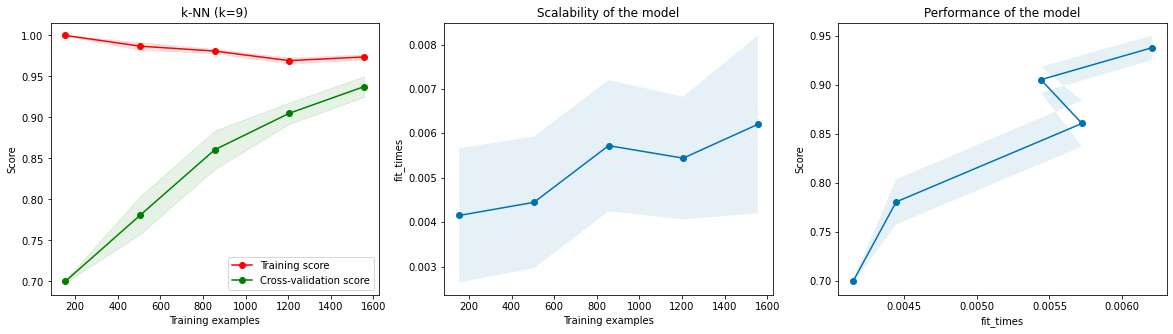

--------------------------------------------------


In [26]:
task = "k-NN"

from sklearn.neighbors import KNeighborsClassifier

f1 = []
train_acc = []
test_acc = []
params = [1, 3, 5, 7, 9]

for k in params:
    print("K = ", k)
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        "cross_validation_score": cross_val_score(clf, x, y, cv=10)
    }
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    print("Cross Validation Score")
    print(result[task][k]["cross_validation_score"])

    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    plot_learning_curve(clf, f"{task} (k={k})", x, y, axes=None, cv=10, n_jobs=4)
    plt.savefig(f'car_plots/learning_curve_{task}_{k}.png')
    plt.show()
    print("--------------------------------------------------")

--------------------------------------------------

In [ ]:
results